In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import re
import warnings
from string import punctuation
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from prettytable import PrettyTable

## Load dataset 

In [2]:
columns = ['GT','jobid','title','company_profile','description','requirements','benifits','has_logo','has_question']
data = pd.read_csv('fake_job_postings.csv', names=columns, header=1, encoding = 'latin-1')

## Clean the text data

In [3]:
data.dropna(inplace=True)

In [4]:
def clean(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', text)
    text = re.sub(r'\s\s+', ' ', text)
    text = text.lstrip(' ') 
    return text

In [5]:
data['company_profile'] = data['company_profile'].apply(clean)
data['requirements'] = data['requirements'].apply(clean)
data['benifits'] = data['benifits'].apply(clean)

In [6]:
data.head()

,GT,jobid,title,company_profile,description,requirements,benifits,has_logo,has_question
1,0,2,Customer Service - Cloud Video Production,90 seconds the worlds cloud video production s...,Organised - Focused - Vibrant - Awesome!Do you...,what we expect from you your key responsibilit...,what you will get from usthrough being part of...,1,0
3,0,4,Account Executive - Washington DC,our passion for improving quality of life thro...,THE COMPANY: ESRI â Environmental Systems Re...,education â bachelorâs or masterâs in gis ...,our culture is anything but corporateâwe hav...,1,0
4,0,5,Bill Review Manager,spotsource solutions llc is a global human cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,qualifications rn license in the state of texa...,full benefits offered,1,1
6,0,7,Head of Content (m/f),founded in 2009 theâ fonpit agâ rose with its ...,Your Responsibilities:Â Manage the English-spe...,your know how â â â â â â â â â â â â â â â â ...,your benefits â being part of a fast growing c...,1,1
7,0,8,Lead Guest Service Specialist,airenvyâs mission is to provide lucrative ye...,Who is Airenvy?Hey there! We are seasoned entr...,experience with crm software live chat and pho...,competitive pay â you ll be able to eat steak ...,1,1


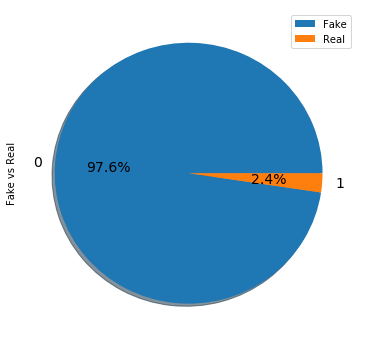

In [7]:
# Check the dataset distribution
data["GT"].value_counts().plot(kind = 'pie', figsize = (6, 6), fontsize=14, autopct = '%1.1f%%', shadow = True)
plt.ylabel("Fake vs Real")
plt.legend(["Fake", "Real"])
plt.show()

## Let's start from the easy one with only numeric values

In [8]:
# Get Ground Truth and combine two numeric features as one
X = data.iloc[:,7:9].values
y = data['GT'].values

### Using Naive Bayes Classifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ,random_state = 10)

In [10]:
nbc = MultinomialNB()
nbc.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [11]:
predictions = nbc.predict(X_test)

In [12]:
print(classification_report(y_test ,predictions))
print('Confusion Matrix: \n',confusion_matrix(y_test ,predictions))
print()
numeric_NBC_acc = accuracy_score(y_test, predictions)
print('Accuracy: ', numeric_NBC_acc)
print()

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2594
          1       0.00      0.00      0.00        60

avg / total       0.96      0.98      0.97      2654

Confusion Matrix: 
 [[2594    0]
 [  60    0]]

Accuracy:  0.977392614921



### Using LogisticRegression Classifier

In [13]:
clf = LogisticRegression()
clf.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
predictions = clf.predict(X_test)

In [15]:
print(classification_report(y_test ,predictions))
print('Confusion Matrix: \n',confusion_matrix(y_test ,predictions))
print()
numeric_CLF_acc = accuracy_score(y_test, predictions)
print('Accuracy: ', numeric_CLF_acc)
print()

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2594
          1       0.00      0.00      0.00        60

avg / total       0.96      0.98      0.97      2654

Confusion Matrix: 
 [[2594    0]
 [  60    0]]

Accuracy:  0.977392614921



## Now let's deal with text 

### Using Bag of Words

#### Feature1: company_profile

In [16]:
X = data['company_profile']
y = data['GT'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ,random_state = 10)

Using Naive Bayes Classifier

In [18]:
# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()), 
    ('classifier', MultinomialNB()),
])
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [19]:
predictions = pipeline.predict(X_test)

In [20]:
print(classification_report(y_test ,predictions))
print('Confusion Matrix: \n',confusion_matrix(y_test ,predictions))
print()
F1_nbc_acc = accuracy_score(y_test ,predictions)
print('Accuracy: ', F1_nbc_acc)
print()

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2594
          1       0.82      0.85      0.84        60

avg / total       0.99      0.99      0.99      2654

Confusion Matrix: 
 [[2583   11]
 [   9   51]]

Accuracy:  0.992464204974



Using LogisticRegression Classifier

In [21]:
# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()), 
    ('classifier', LogisticRegression()),
])
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [22]:
predictions = pipeline.predict(X_test)

In [23]:
print(classification_report(y_test ,predictions))
print('Confusion Matrix: \n',confusion_matrix(y_test ,predictions))
print()
F1_clf_acc = accuracy_score(y_test ,predictions)
print('Accuracy: ', F1_clf_acc)
print()

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2594
          1       1.00      0.93      0.97        60

avg / total       1.00      1.00      1.00      2654

Confusion Matrix: 
 [[2594    0]
 [   4   56]]

Accuracy:  0.998492840995



#### Feature2: description

In [24]:
X = data['description']
y = data['GT'].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ,random_state = 10)

Using Naive Bayes Classifier

In [26]:
# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()), 
    ('classifier', MultinomialNB()),
])
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [27]:
predictions = pipeline.predict(X_test)

In [28]:
print(classification_report(y_test ,predictions))
print('Confusion Matrix: \n',confusion_matrix(y_test ,predictions))
print()
F2_nbc_acc = accuracy_score(y_test ,predictions)
print('Accuracy: ', F2_nbc_acc)
print()

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2594
          1       0.50      0.20      0.29        60

avg / total       0.97      0.98      0.97      2654

Confusion Matrix: 
 [[2582   12]
 [  48   12]]

Accuracy:  0.977392614921



Using LogisticRegression Classifier

In [29]:
# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()), 
    ('classifier', LogisticRegression()),
])
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [30]:
predictions = pipeline.predict(X_test)

In [31]:
print(classification_report(y_test ,predictions))
print('Confusion Matrix: \n',confusion_matrix(y_test ,predictions))
print()
F2_clf_acc = accuracy_score(y_test ,predictions)
print('Accuracy: ', F2_clf_acc)
print()

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2594
          1       0.90      0.58      0.71        60

avg / total       0.99      0.99      0.99      2654

Confusion Matrix: 
 [[2590    4]
 [  25   35]]

Accuracy:  0.989073097212



#### Feature3: requirements

In [32]:
X = data['requirements']
y = data['GT'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ,random_state = 10)

Using Naive Bayes Classifier

In [34]:
# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()), 
    ('classifier', MultinomialNB()),
])
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [35]:
predictions = pipeline.predict(X_test)

In [36]:
print(classification_report(y_test ,predictions))
print('Confusion Matrix: \n',confusion_matrix(y_test ,predictions))
print()
F3_nbc_acc = accuracy_score(y_test ,predictions)
print('Accuracy: ', F3_nbc_acc)
print()

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      2594
          1       0.38      0.08      0.14        60

avg / total       0.97      0.98      0.97      2654

Confusion Matrix: 
 [[2586    8]
 [  55    5]]

Accuracy:  0.976262245667



Using LogisticRegression Classifier

In [37]:
# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()), 
    ('classifier', LogisticRegression()),
])
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [38]:
predictions = pipeline.predict(X_test)

In [39]:
print(classification_report(y_test ,predictions))
print('Confusion Matrix: \n',confusion_matrix(y_test ,predictions))
print()
F3_clf_acc = accuracy_score(y_test ,predictions)
print('Accuracy: ', F3_clf_acc)
print()

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2594
          1       0.89      0.53      0.67        60

avg / total       0.99      0.99      0.99      2654

Confusion Matrix: 
 [[2590    4]
 [  28   32]]

Accuracy:  0.987942727958



#### Feature4: benefits

In [40]:
X = data['benifits']
y = data['GT'].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 ,random_state = 10)

Using Naive Bayes Classifer

In [42]:
# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()), 
    ('classifier', MultinomialNB()),
])
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [43]:
predictions = pipeline.predict(X_test)

In [44]:
print(classification_report(y_test ,predictions))
print('Confusion Matrix: \n',confusion_matrix(y_test ,predictions))
print()
F4_nbc_acc = accuracy_score(y_test ,predictions)
print('Accuracy: ', F4_nbc_acc)
print()

             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2594
          1       0.69      0.40      0.51        60

avg / total       0.98      0.98      0.98      2654

Confusion Matrix: 
 [[2583   11]
 [  36   24]]

Accuracy:  0.982290881688



Using LogisticRegression Classifer

In [45]:
# create pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer()), 
    ('classifier', LogisticRegression()),
])
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [46]:
predictions = pipeline.predict(X_test)

In [47]:
print(classification_report(y_test ,predictions))
print('Confusion Matrix: \n',confusion_matrix(y_test ,predictions))
print()
F4_clf_acc = accuracy_score(y_test ,predictions)
print('Accuracy: ', F4_clf_acc)
print()

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      2594
          1       0.93      0.62      0.74        60

avg / total       0.99      0.99      0.99      2654

Confusion Matrix: 
 [[2591    3]
 [  23   37]]

Accuracy:  0.990203466466



#### Results 

In [48]:
feature = ['company_profile', 'description', 'requirements', 'benefits', 'numeric_val']
nbc_accuracy = [F1_nbc_acc, F2_nbc_acc, F3_nbc_acc, F4_nbc_acc, numeric_NBC_acc]
clf_accuracy = [F1_clf_acc, F2_clf_acc, F3_clf_acc, F4_clf_acc, numeric_CLF_acc]

In [49]:
result_table = PrettyTable()
result_table.field_names = ['Feature','Naive Bayes Accuracy', 'LogisticRegression Accuracy']
result_table.add_row(["numeric_val",numeric_NBC_acc, numeric_CLF_acc])
result_table.add_row(["company_profile",F1_nbc_acc, F1_clf_acc])
result_table.add_row(["description",F2_nbc_acc, F2_clf_acc])
result_table.add_row(["requirements",F3_nbc_acc, F3_clf_acc])
result_table.add_row(["benefits",F4_nbc_acc, F4_clf_acc])
print(result_table)

+-----------------+----------------------+-----------------------------+
|     Feature     | Naive Bayes Accuracy | LogisticRegression Accuracy |
+-----------------+----------------------+-----------------------------+
|   numeric_val   |    0.977392614921    |        0.977392614921       |
| company_profile |    0.992464204974    |        0.998492840995       |
|   description   |    0.977392614921    |        0.989073097212       |
|   requirements  |    0.976262245667    |        0.987942727958       |
|     benefits    |    0.982290881688    |        0.990203466466       |
+-----------------+----------------------+-----------------------------+


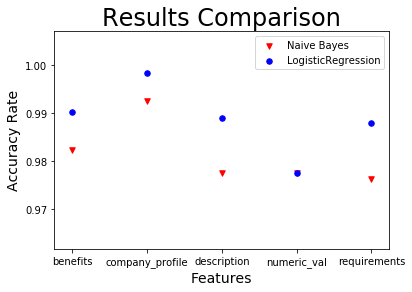

In [50]:
plt.title("Results Comparison",fontsize=24)
plt.xlabel("Features",fontsize=14)
plt.ylabel("Accuracy Rate",fontsize=14)
plt.tick_params(axis='both',labelsize=10)
plt.scatter(feature, nbc_accuracy, s=30, c="red", marker='v')
plt.scatter(feature, clf_accuracy, s=30, c='blue', marker='o' )
plt.legend(['Naive Bayes','LogisticRegression'])
plt.show()

## Summary of Results

At the begining of this project, I tried to load the dataset with the 'utf-8' encoding format but failed. Then I read the dataset with 'latin-1' encoding format successfully. However, many entries were not read and the results were NaN. Hence, I droped those empty data so that they won't affect the accuracy of machine learning algorithms. After that, I cleaned the dataset for the machine learning part.

For this project, I mainly used two machine learning algorithms. One is Naive Bayes Classifier and the other is LogisticRegression Classifier. I considered two numeric columns as one feature, and each of the remaining columns is one feature. Thus, we got ten accuracy results shown in the table and image above. 

From them, we find that the average performance of LogisticRegression method is better than Naive Bayes method. And when we choose 'company profile' as the feature, it yeilds the best accuracy which is 99.8%. 